In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

## Load datas

In [38]:
df_same = pd.read_csv('../final_data/res_same_epsilon_final.csv')
df_diff = pd.read_csv('../final_data/res_diff_epsilon.csv')

In [30]:
#Convert into int if digit
def convert_into_digit(df):
    df['Iteration'] = df['Iteration'].apply(lambda x: int(x) if str(x).isdigit() else x)
    return df

def sep_data(df): 
    lc_df = df[~(df['Iteration']=='last 100 iterations mean')]
    fin_df = df[df['Iteration']=='last 100 iterations mean']
    return lc_df, fin_df
    

In [39]:
df_same = convert_into_digit(df_same)
df_diff = convert_into_digit(df_diff)

In [40]:
lc_df_same, fin_df_same = sep_data(df_same)
lc_df_diff, fin_df_diff = sep_data(df_diff)

## Useful fct

In [54]:
def plot_learning_curve(lc_df, nb_iter, beta):
    mean_df = lc_df[lc_df['beta']==beta].groupby('Iteration')[['Reward1', 'Reward2', 'Price1', 'Price2', 'Epsilon1', 'Epsilon2', 'beta']].mean().reset_index()
    # Assuming df contains 'Rewards' and 'Iteration' columns
    plt.figure(figsize=(10, 6))

    # Plot rewards for each player
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward1'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 1')
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward2'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 2')

    plt.axhline(y=0.34, color='r', linestyle='--', label='Collusion Profits')
    plt.axhline(y=0.23, color='g', linestyle='--', label='Nash Profits')

    # Customize the plot
    plt.title(f'Learning Curves for $\\beta$={beta}')
    plt.xlabel('Iteration')
    plt.ylabel('Rewards')
    plt.legend()
    plt.grid(True)
    plt.show()

    
def repart_rewards(df_beta):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted['Reward1'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    sns.boxplot(x='beta', y=df_beta_sorted['Reward2'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    plt.axhline(y=0.34, color='r', linestyle='--', label='Collusion Profits')
    plt.axhline(y=0.23, color='g', linestyle='--', label='Nash Profits')
    
    plt.xlabel('Beta')
    plt.ylabel('Final rewards')
    plt.title('Box Plot of final rewards grouped by $\\beta$')
    
    print(df_beta_sorted['beta'].unique())
      # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]
    
    # Set custom tick positions and labels on the x-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45)
    plt.show()


## Prob of choose a random action

In [64]:
df_same['beta'].unique()

array([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

In [78]:
sorted([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 1.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

[1e-07,
 2.5e-07,
 5e-07,
 7.5e-07,
 1e-06,
 2.5e-06,
 5e-06,
 7.5e-06,
 1e-05,
 2.5e-05,
 5e-05,
 7.5e-05,
 0.0001,
 0.00025,
 0.0005,
 0.00075,
 0.001,
 0.0025,
 0.005,
 0.0075]

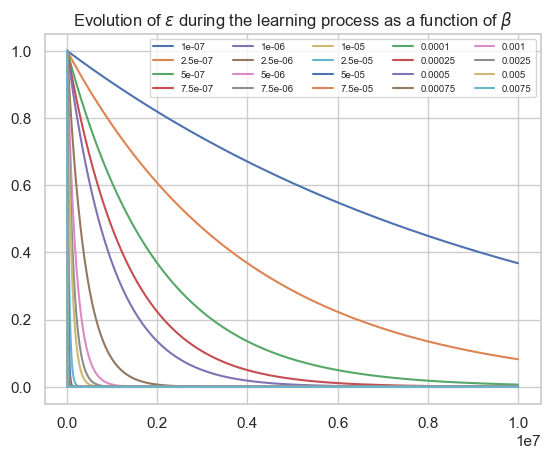

In [77]:
for beta in sorted([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 1.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05]):
    t = np.linspace(0,10**(7),1000)
    plt.plot(t, np.exp(-beta*t), label=beta)
    plt.title('Evolution of $\\epsilon$ during the learning process as a function of $\\beta$')
    plt.legend(fontsize=7, ncol = 5)

## Learing curves

In [41]:
df_same['beta'].unique()

array([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

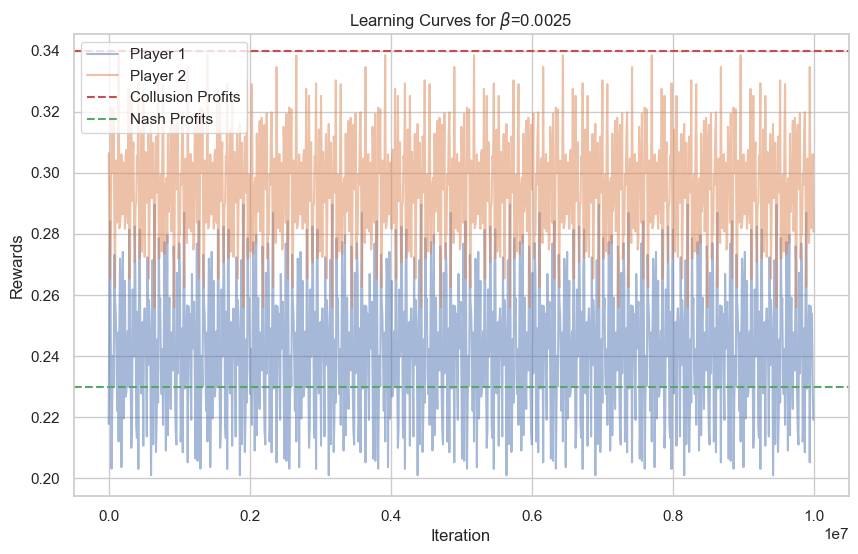

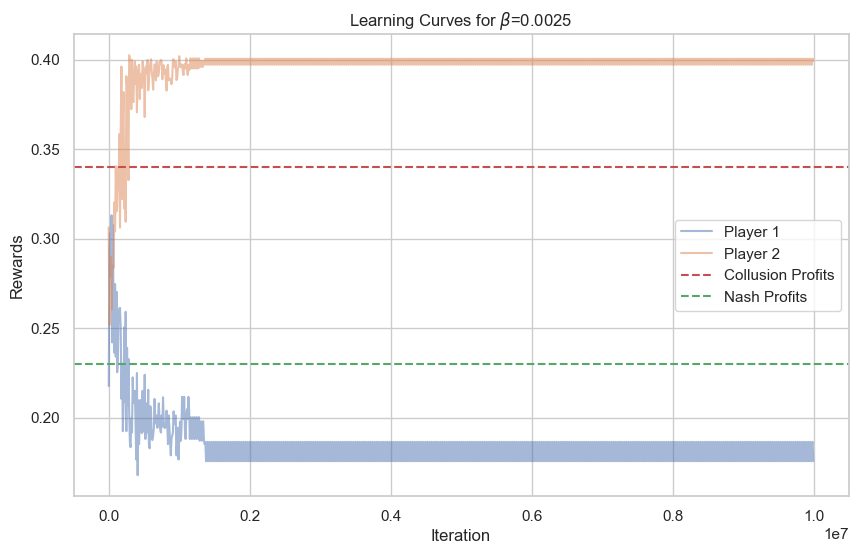

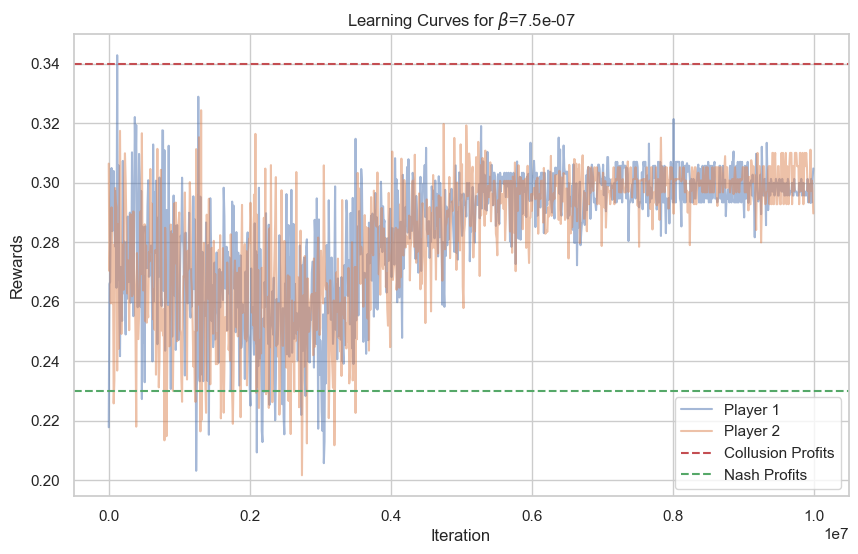

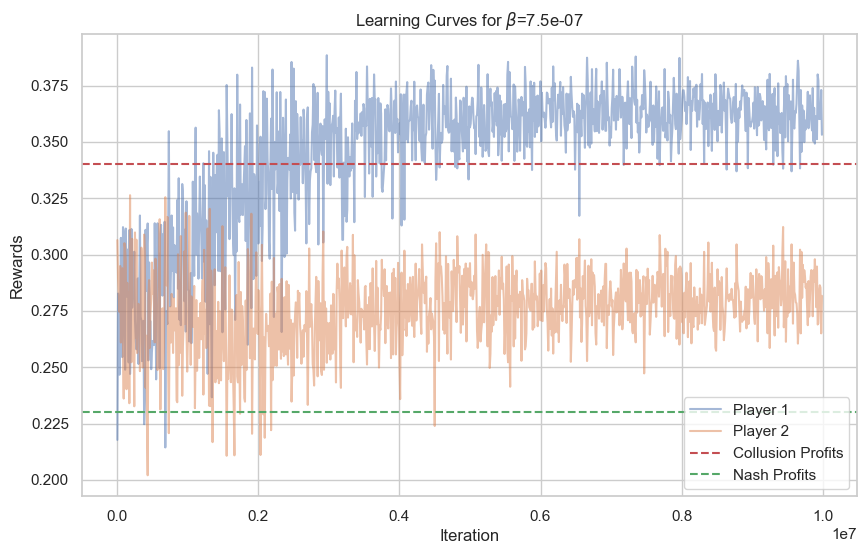

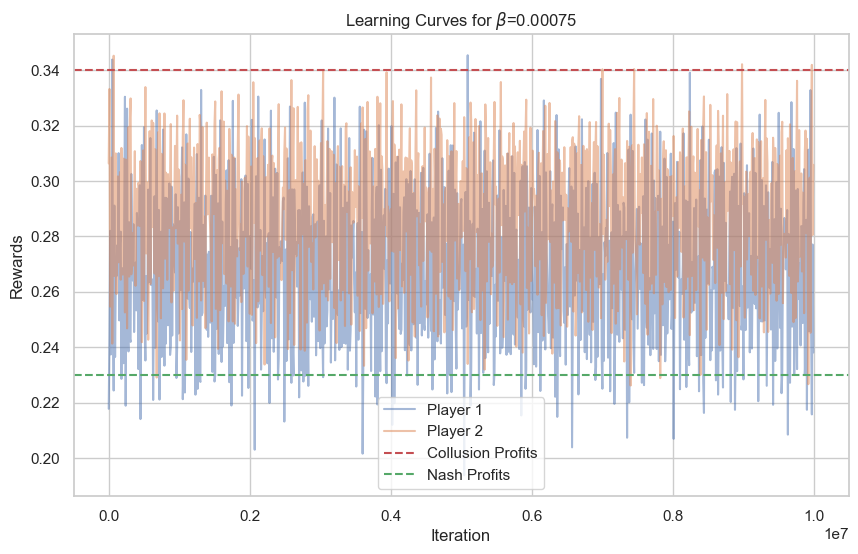

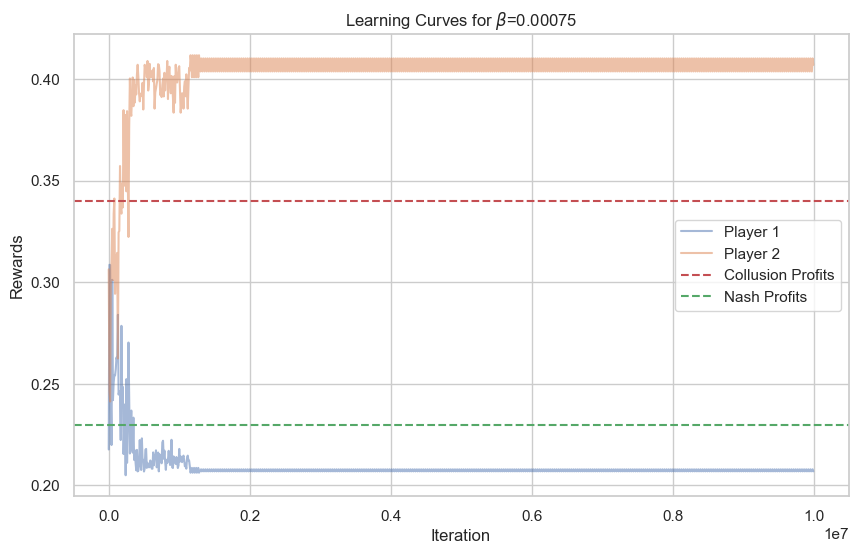

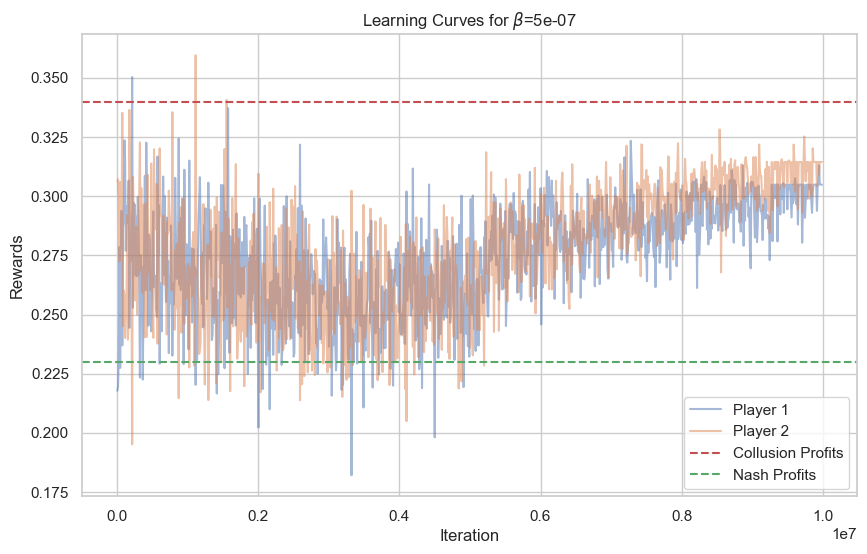

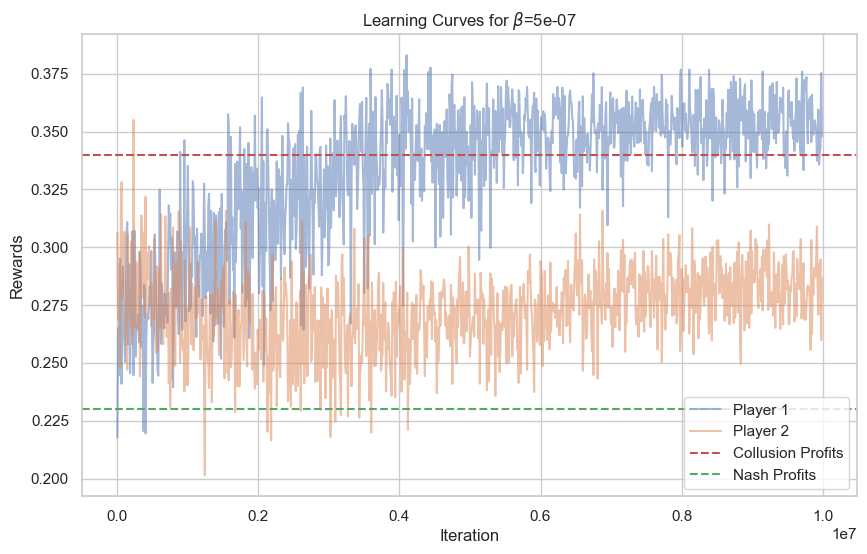

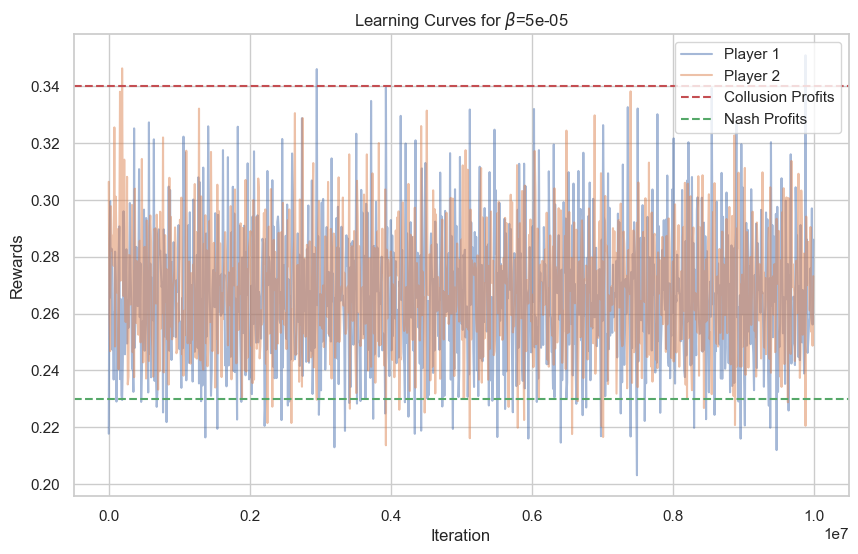

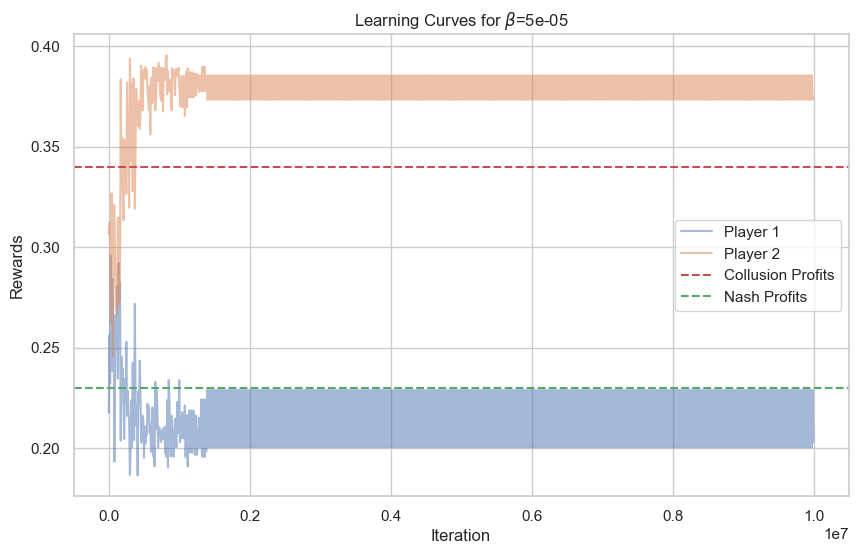

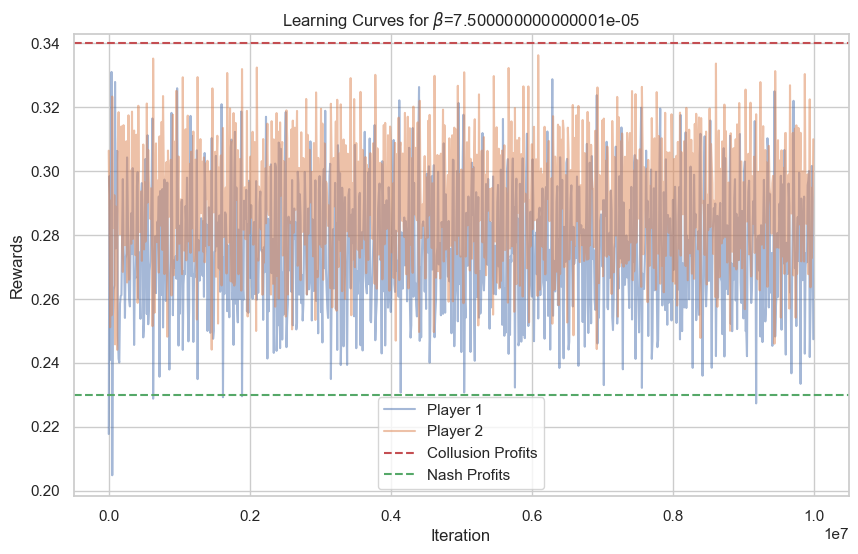

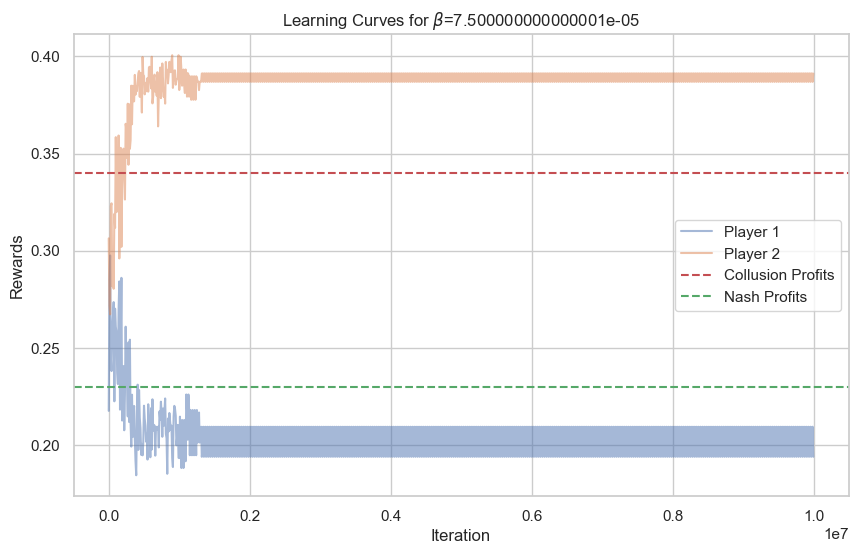

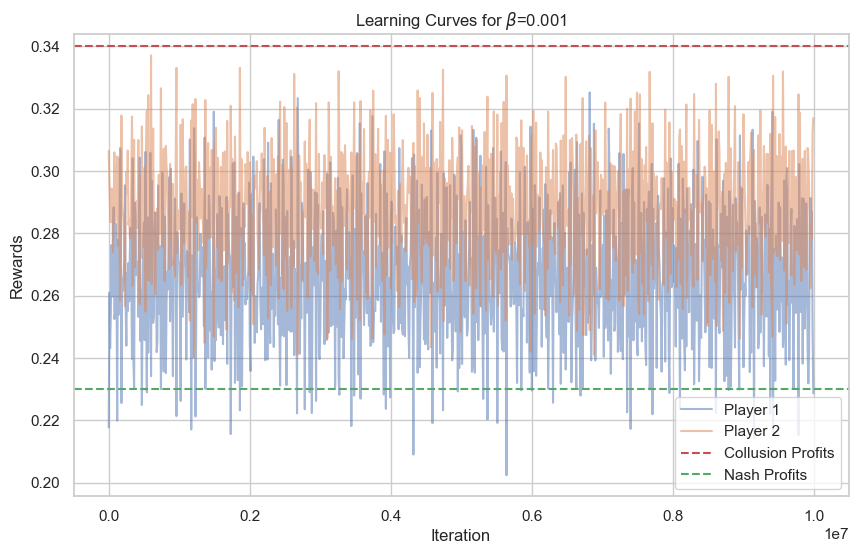

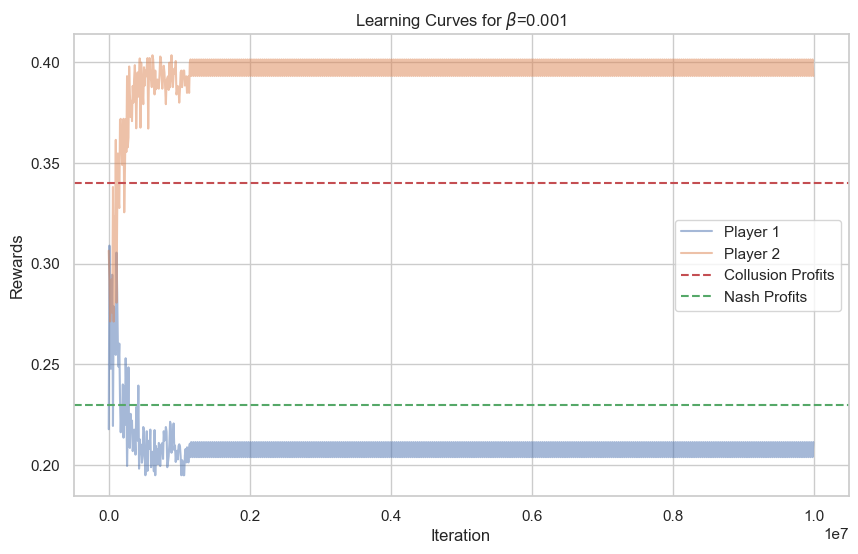

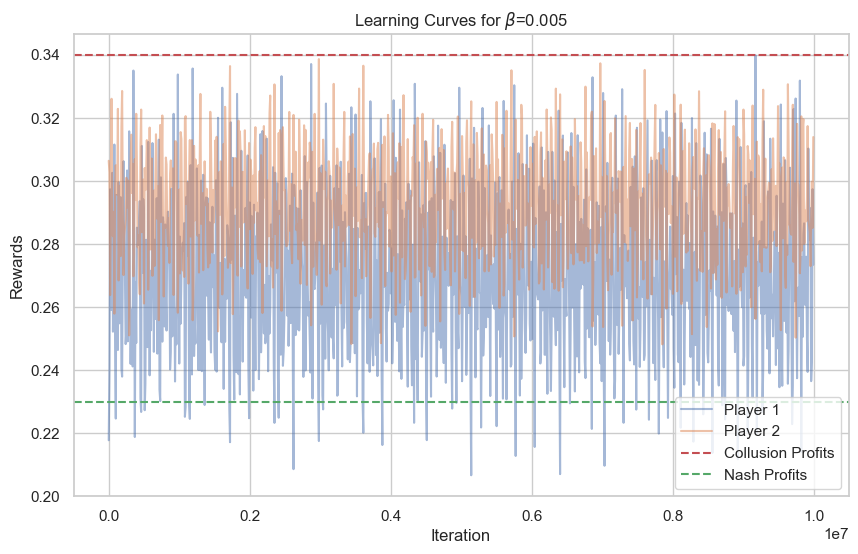

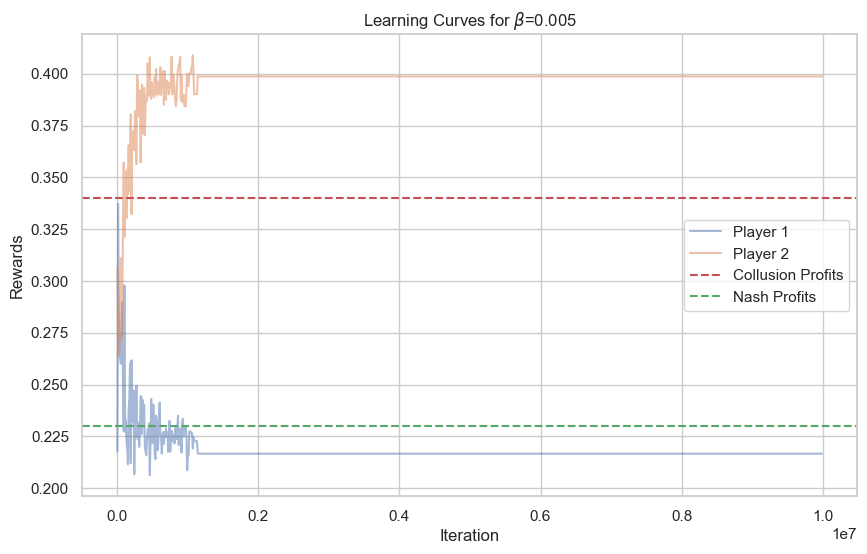

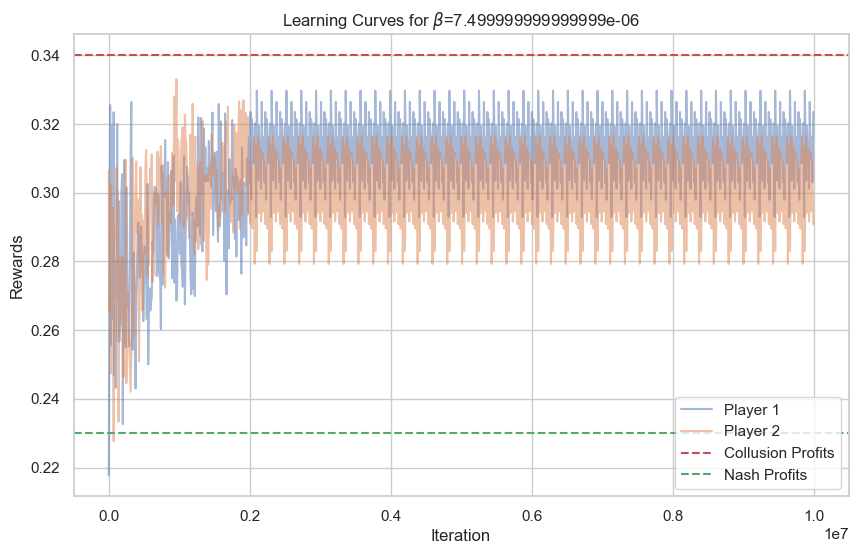

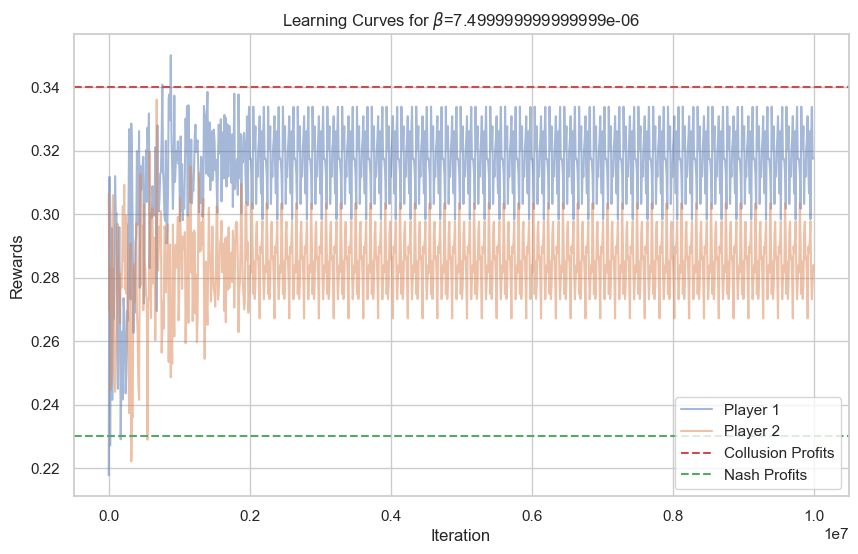

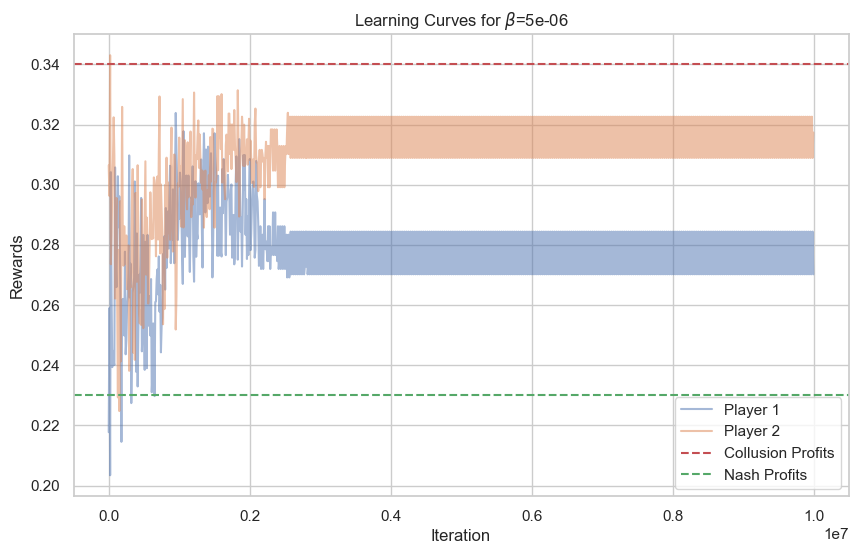

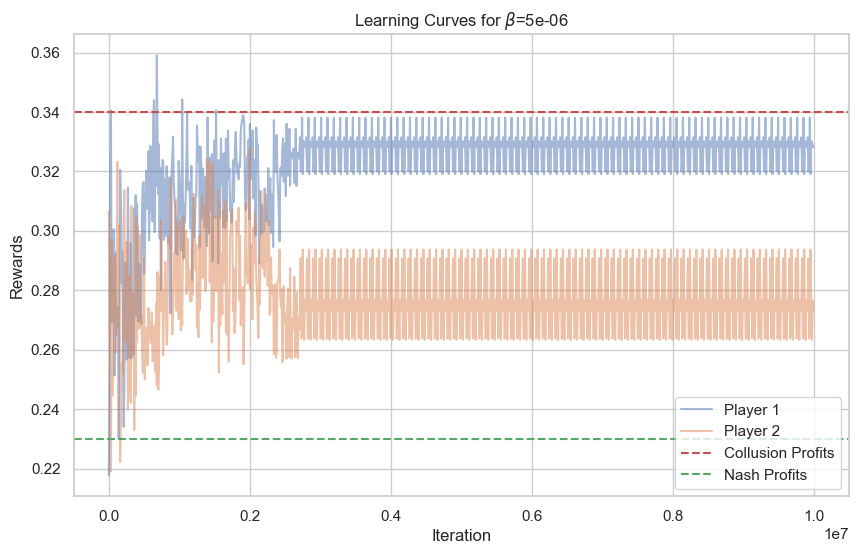

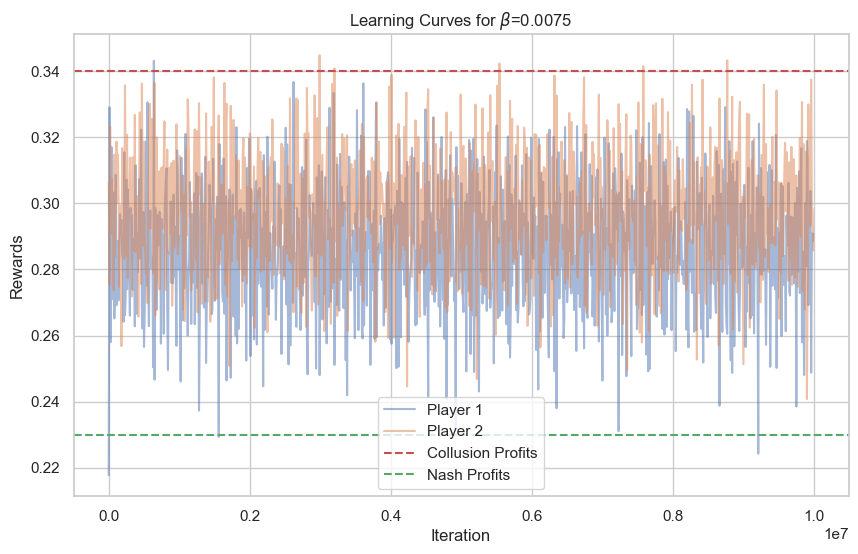

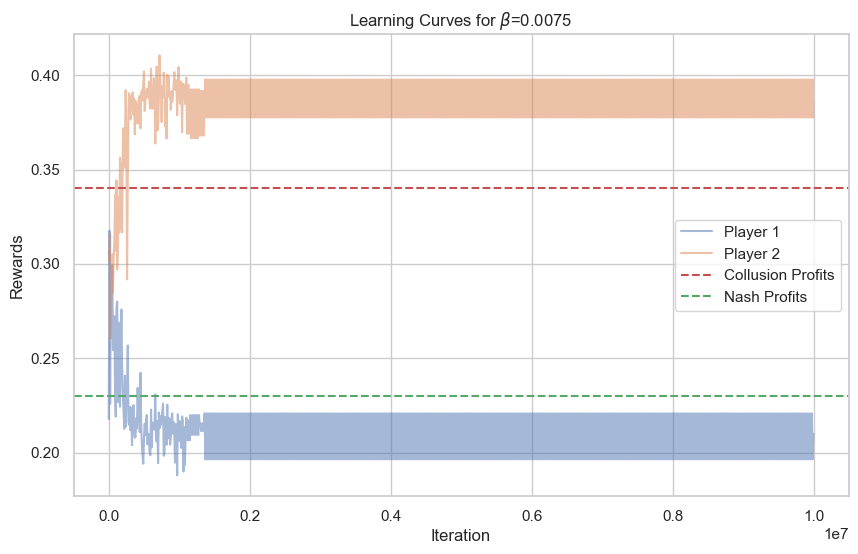

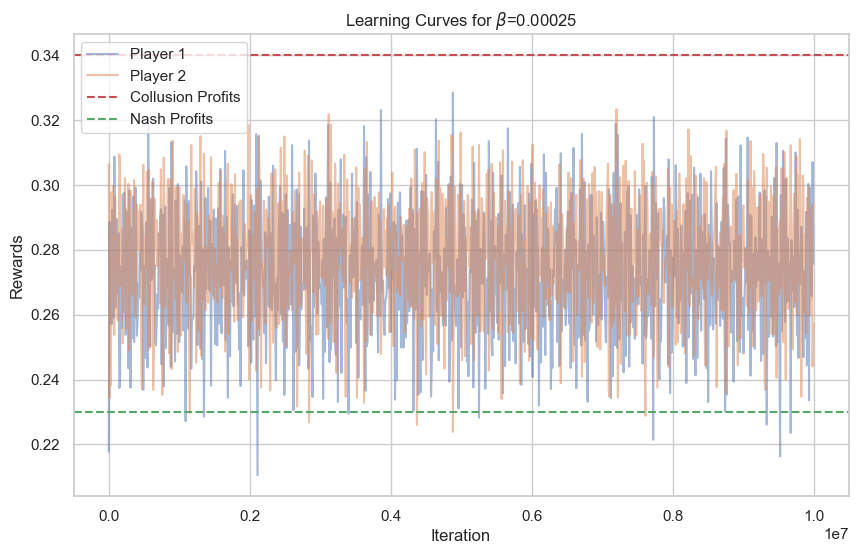

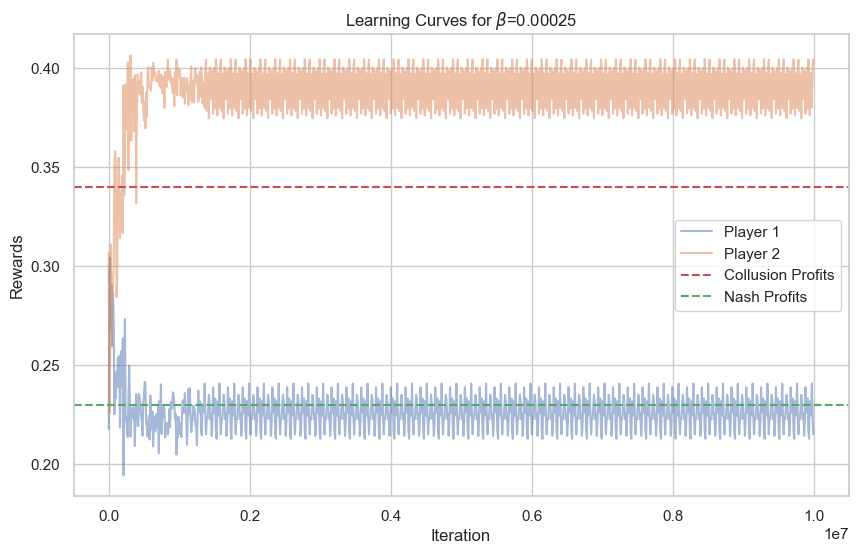

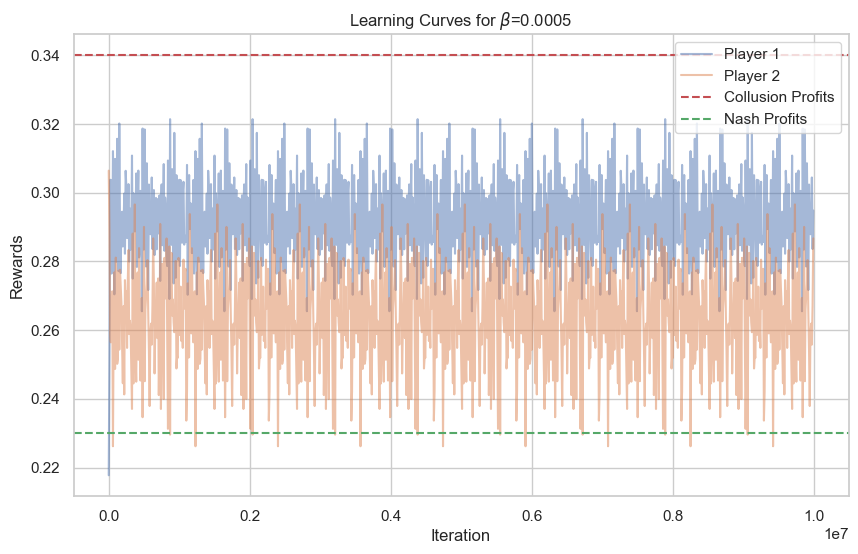

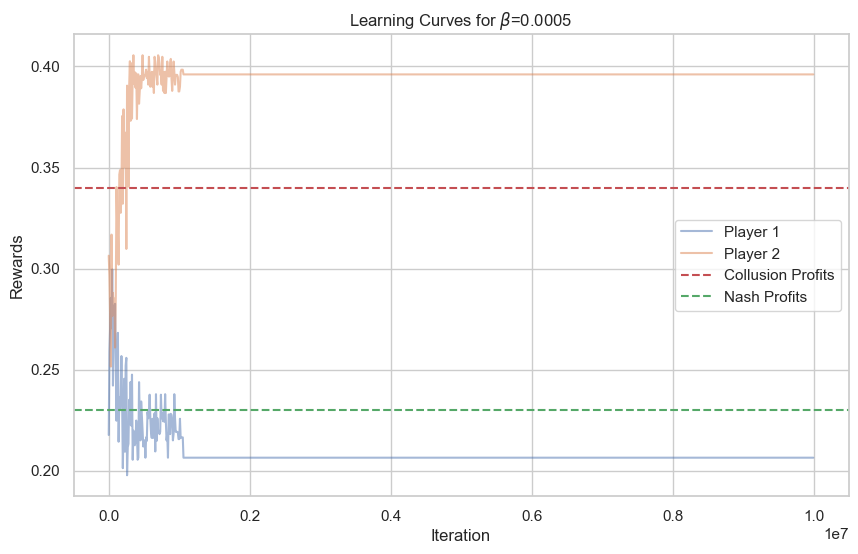

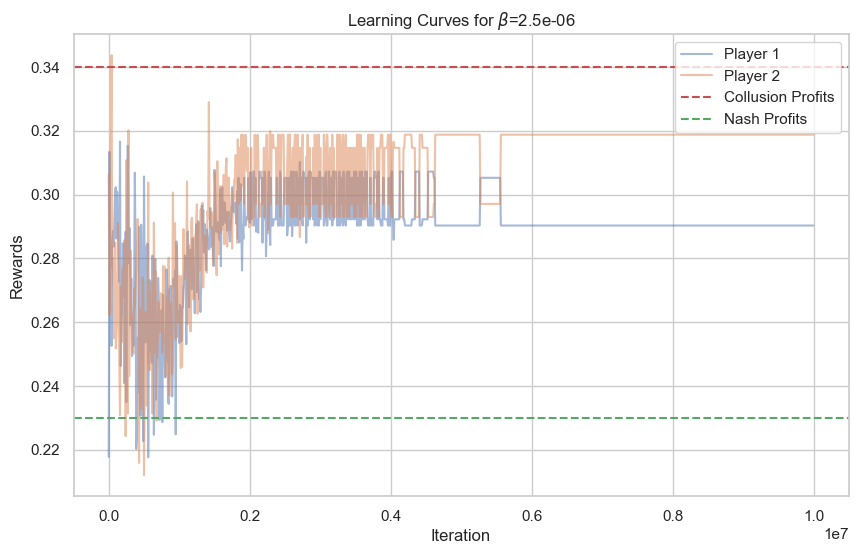

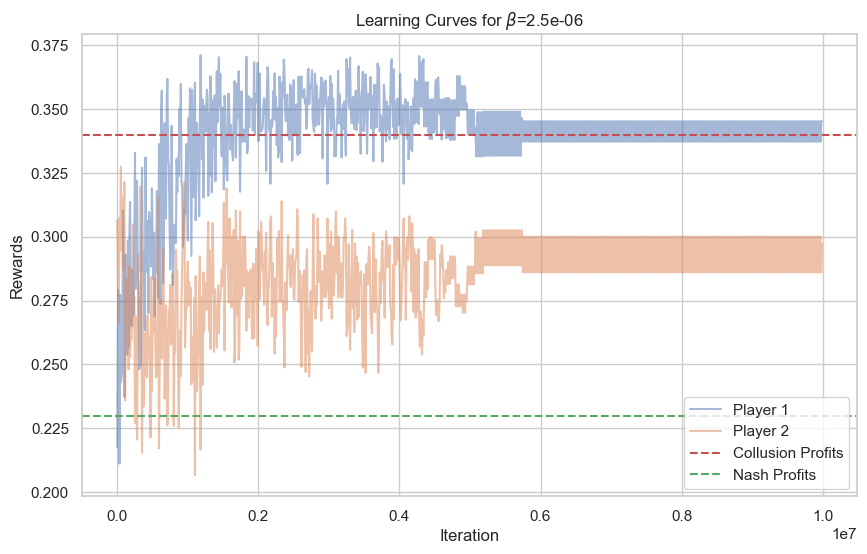

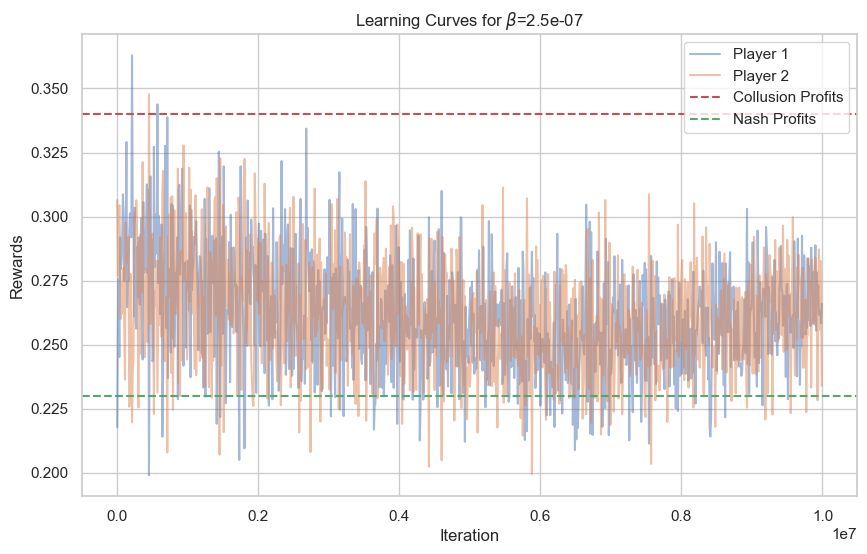

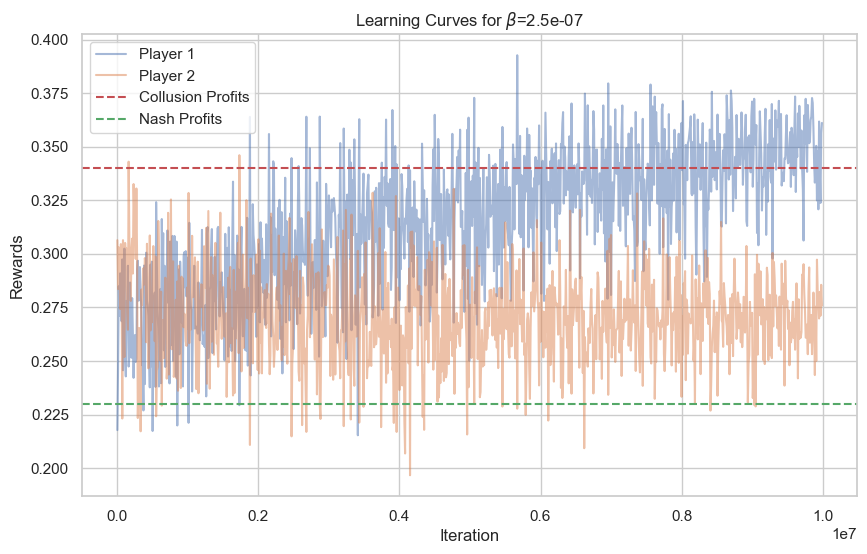

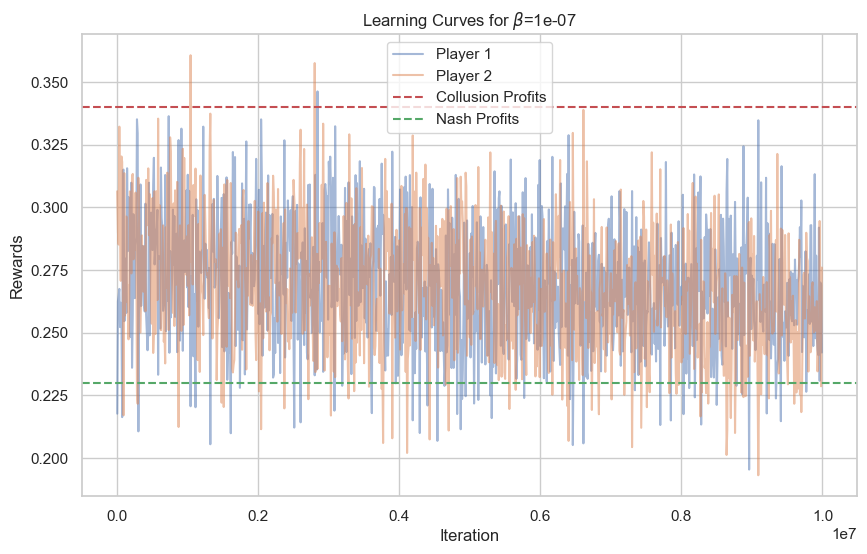

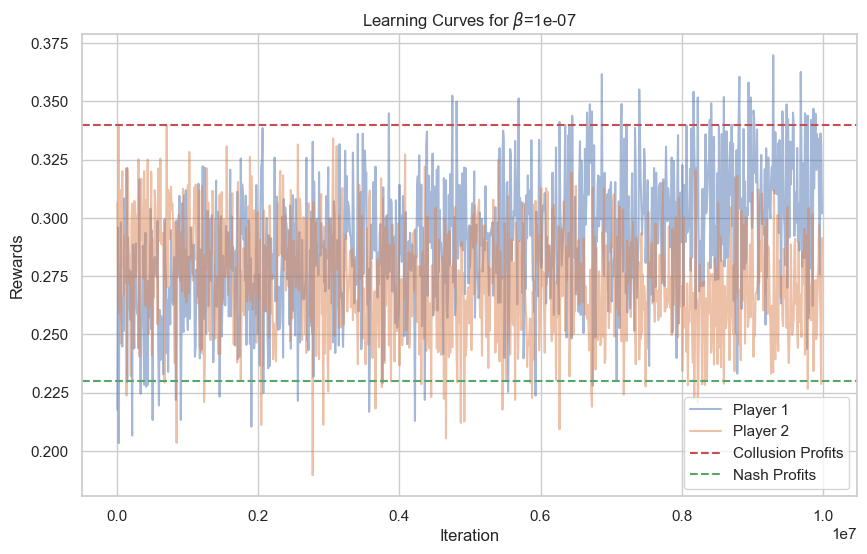

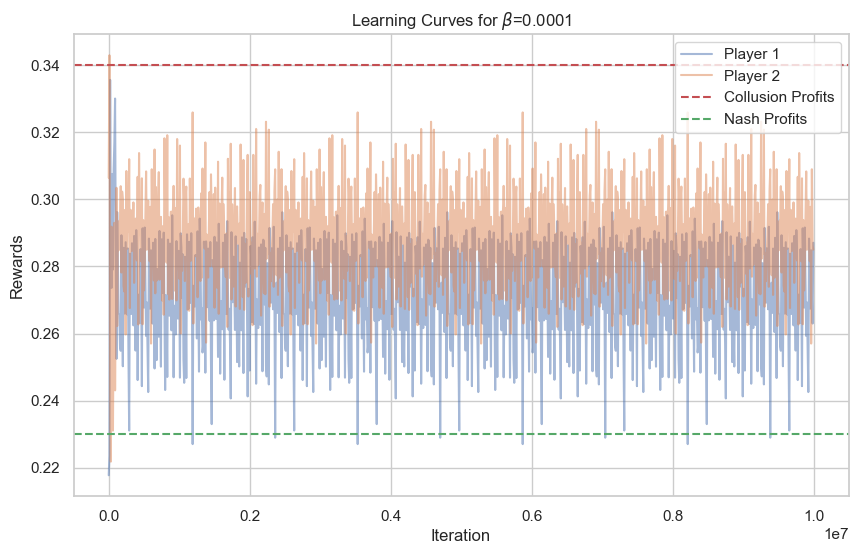

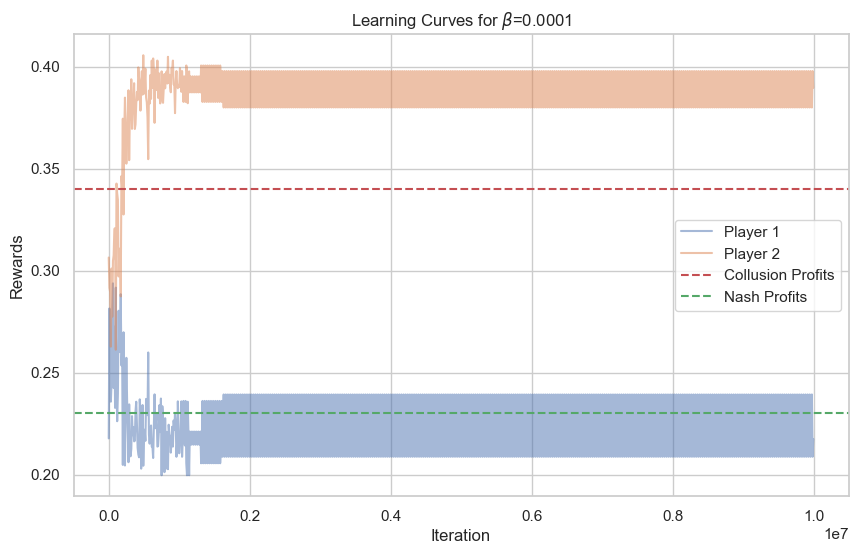

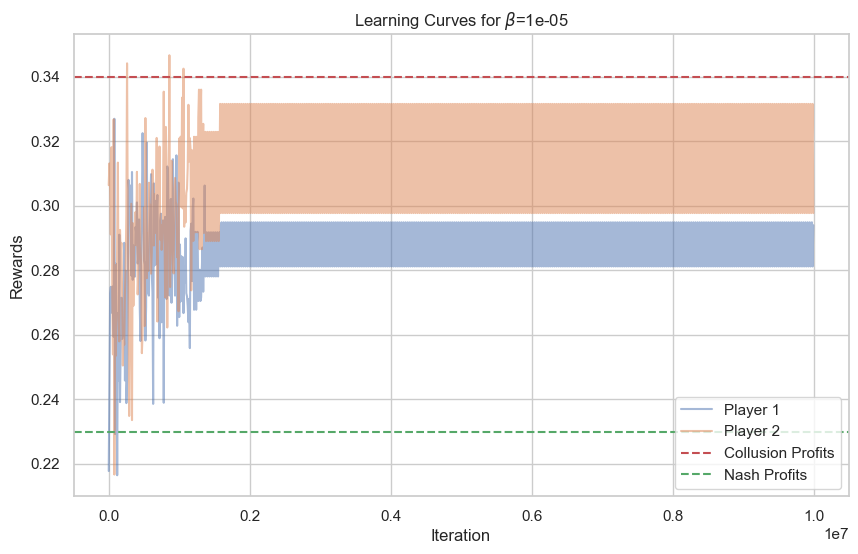

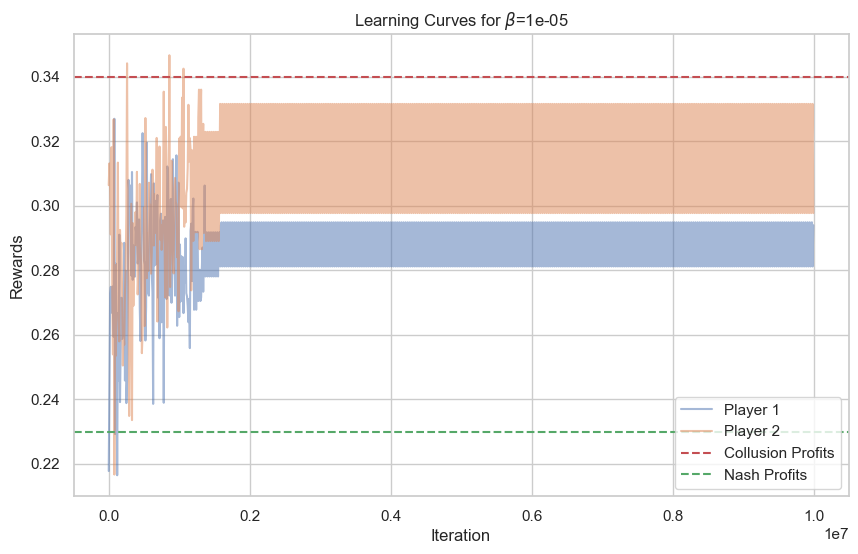

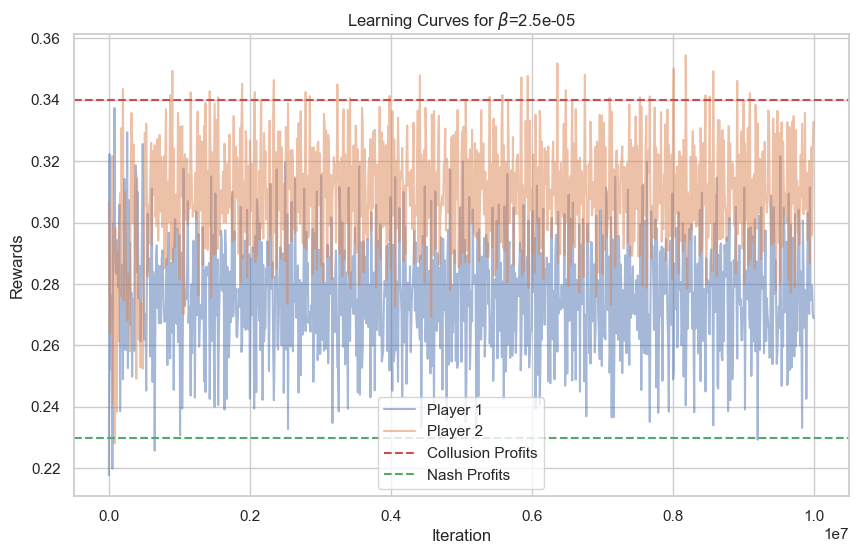

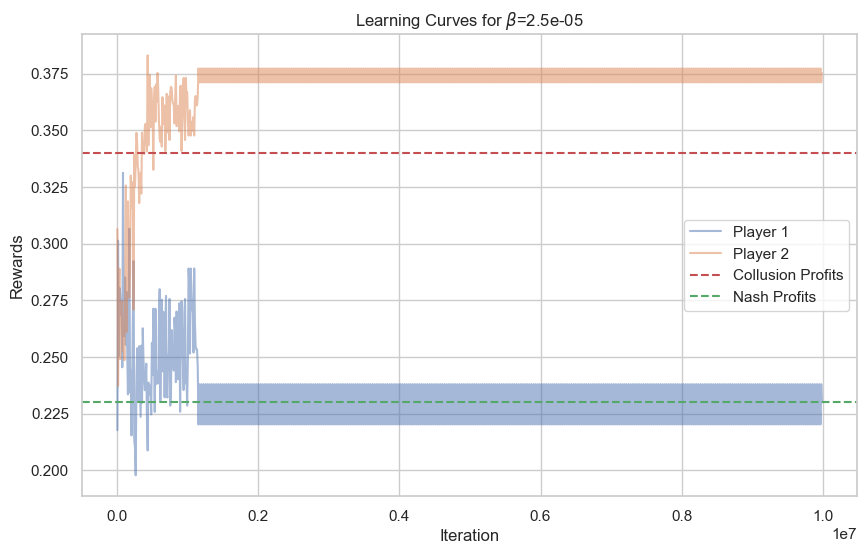

In [55]:
for beta in df_same['beta'].unique():
    plot_learning_curve(lc_df_same, (10**(7)), beta)
    plot_learning_curve(lc_df_diff, (10**(7)), beta)

## 3- Final rewards and prices as a function of beta

In [14]:
fin_df

Iteration      beta  index   Reward1   Reward2  \
1001    last 100 iterations mean  0.002500      1  0.240028  0.252429   
2003    last 100 iterations mean  0.002500      2  0.328147  0.266707   
3005    last 100 iterations mean  0.002500      3  0.245414  0.332801   
4007    last 100 iterations mean  0.002500      4  0.257962  0.295304   
5009    last 100 iterations mean  0.002500      5  0.289896  0.250192   
...                          ...       ...    ...       ...       ...   
186371  last 100 iterations mean  0.000025      6  0.276475  0.276642   
187373  last 100 iterations mean  0.000025      7  0.274270  0.287037   
188375  last 100 iterations mean  0.000025      8  0.257217  0.314209   
189377  last 100 iterations mean  0.000025      9  0.304350  0.271275   
190379  last 100 iterations mean  0.000025     10  0.286081  0.325032   

         Price1   Price2       Epsilon1       Epsilon2  
1001    1.65850  1.61170   0.000000e+00   0.000000e+00  
2003    1.71154  1.79734   0.000000e+00   0.000000e+00  
3005    1.82230  1.67098   0.000000e+00   0.000000e+00  
4007    1.73416  1.68112   0.000000e+00   0.000000e+00  
5009    1.58050  1.63900   0.000000e+00   0.000000e+00  
...         ...      ...            ...            ...  
186371  1.66357  1.66474  2.672563e-109  2.672563e-109  
187373  1.68814  1.67410  2.672563e-109  2.672563e-109  
188375  1.75990  1.68970  2.672563e-109  2.672563e-109  
189377  1.68190  1.72363  2.672563e-109  2.672563e-109  
190379  1.78798  1.72519  2.672563e-109  2.672563e-109  

[190 rows x 9 columns]

In [17]:
def repart_rewards(df_beta):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted['Reward1'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    sns.boxplot(x='beta', y=df_beta_sorted['Reward2'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    
    plt.xlabel('Beta')
    plt.ylabel('Final rewards')
    plt.title('Box Plot of final rewards grouped by $\\beta$')
    
    print(df_beta_sorted['beta'].unique())
      # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]
    
    # Set custom tick positions and labels on the x-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45)
    plt.show()

[1.0e-07 2.5e-07 5.0e-07 7.5e-07 2.5e-06 5.0e-06 7.5e-06 1.0e-05 2.5e-05
 5.0e-05 7.5e-05 1.0e-04 2.5e-04 5.0e-04 7.5e-04 1.0e-03 2.5e-03 5.0e-03
 7.5e-03]


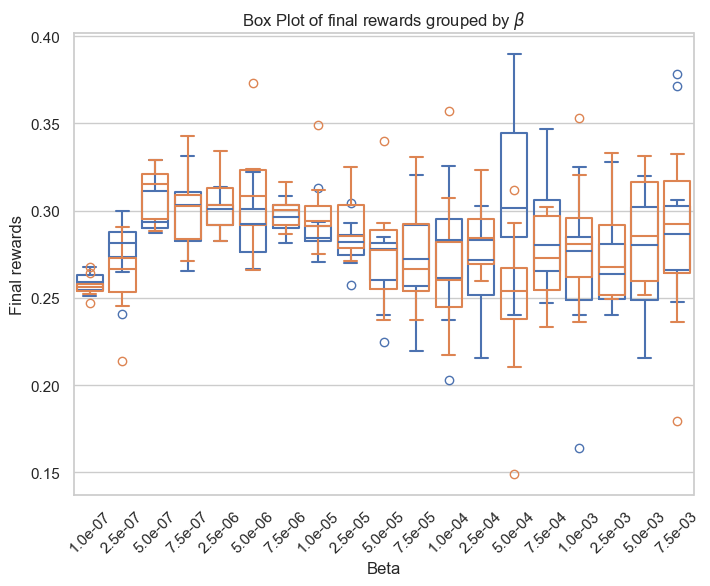

In [18]:
repart_rewards(fin_df)

## For diff $\beta$

In [2]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [3]:
df = pd.read_csv('../final_data/res_diff_epsilon.csv')

In [4]:
df.dtypes

Iteration     object
beta         float64
index          int64
Reward1      float64
Reward2      float64
Price1       float64
Price2       float64
Epsilon1     float64
Epsilon2     float64
dtype: object

In [5]:
#Convert into int if digit
df['Iteration'] = df['Iteration'].apply(lambda x: int(x) if str(x).isdigit() else x)

In [6]:
lc_df = df[~(df['Iteration']=='last 100 iterations mean')]
fin_df = df[df['Iteration']=='last 100 iterations mean']

In [7]:
df['beta'].unique()

array([2.5e-03, 7.5e-07, 7.5e-04, 5.0e-07, 5.0e-05, 7.5e-05, 1.0e-03,
       5.0e-03, 7.5e-06, 5.0e-06, 7.5e-03, 2.5e-04, 5.0e-04, 2.5e-06,
       2.5e-07, 1.0e-07, 1.0e-04, 1.0e-05, 2.5e-05])

In [8]:
df_beta = lc_df[lc_df['beta']==7.5e-07]
df_beta

Iteration          beta  index   Reward1   Reward2  Price1  Price2  \
10020         0  7.500000e-07      1  0.200833  0.280442  1.6195  1.4635   
10021     10000  7.500000e-07      1  0.236313  0.407594  1.9315  1.7365   
10022     20000  7.500000e-07      1  0.353840  0.316564  1.8535  1.8925   
10023     30000  7.500000e-07      1  0.265463  0.265463  1.5805  1.5805   
10024     40000  7.500000e-07      1  0.169348  0.374261  1.8535  1.5415   
...         ...           ...    ...       ...       ...     ...     ...   
20034   9960000  7.500000e-07     10  0.381336  0.274843  1.7755  1.8925   
20035   9970000  7.500000e-07     10  0.381336  0.274843  1.7755  1.8925   
20036   9980000  7.500000e-07     10  0.381336  0.274843  1.7755  1.8925   
20037   9990000  7.500000e-07     10  0.381336  0.274843  1.7755  1.8925   
20038  10000000  7.500000e-07     10  0.381336  0.274843  1.7755  1.8925   

       Epsilon1      Epsilon2  
10020  1.000000  1.000000e+00  
10021  0.992529  9.048465e-01  
10022  0.985113  8.187389e-01  
10023  0.977752  7.408256e-01  
10024  0.970446  6.703267e-01  
...         ...           ...  
20034  0.000570  5.549757e-44  
20035  0.000566  5.021628e-44  
20036  0.000561  4.543756e-44  
20037  0.000557  4.111361e-44  
20038  0.000553  3.720113e-44  

[10010 rows x 9 columns]

In [9]:
mean_df = df_beta.groupby('Iteration')[['Reward1', 'Reward2', 'Price1', 'Price2', 'Epsilon1', 'Epsilon2', 'beta']].mean().reset_index()
mean_df

Iteration   Reward1   Reward2  Price1  Price2  Epsilon1      Epsilon2  \
0             0  0.217750  0.306410  1.7326  1.5844  1.000000  1.000000e+00   
1         10000  0.282714  0.289381  1.7092  1.7092  0.992529  9.048465e-01   
2         20000  0.278395  0.282097  1.7131  1.6897  0.985113  8.187389e-01   
3         30000  0.246678  0.274580  1.6468  1.6039  0.977752  7.408256e-01   
4         40000  0.271307  0.294936  1.6897  1.6624  0.970446  6.703267e-01   
...         ...       ...       ...     ...     ...       ...           ...   
996     9960000  0.362649  0.286384  1.7794  1.8652  0.000570  5.549757e-44   
997     9970000  0.360305  0.285353  1.7833  1.8730  0.000566  5.021628e-44   
998     9980000  0.373034  0.265031  1.7443  1.8730  0.000561  4.543756e-44   
999     9990000  0.353181  0.281686  1.7521  1.8340  0.000557  4.111361e-44   
1000   10000000  0.356581  0.270528  1.7404  1.8379  0.000553  3.720113e-44   

              beta  
0     7.500000e-07  
1     7.500000e-07  
2     7.500000e-07  
3     7.500000e-07  
4     7.500000e-07  
...            ...  
996   7.500000e-07  
997   7.500000e-07  
998   7.500000e-07  
999   7.500000e-07  
1000  7.500000e-07  

[1001 rows x 8 columns]

In [13]:
def plot_learning_curve(mean_df, nb_iter):
    # Assuming df contains 'Rewards' and 'Iteration' columns
    plt.figure(figsize=(10, 6))

    # Plot rewards for each player
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward1'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 1')
    plt.plot(mean_df['Iteration'][mean_df['Iteration']<nb_iter], mean_df['Reward2'][mean_df['Iteration']<nb_iter],alpha=0.5, label='Player 2')

    # Customize the plot
    plt.title('Learning Curves')
    plt.xlabel('Iteration')
    plt.ylabel('Rewards')
    plt.legend()
    plt.grid(True)
    plt.show()

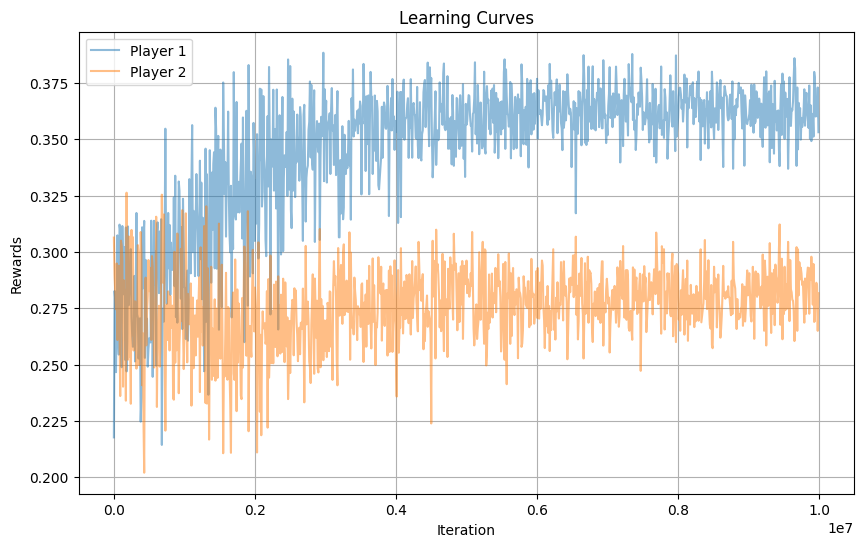

In [14]:
plot_learning_curve(mean_df, 10*(10**(6)))

In [24]:
def repart_rewards(df_beta):
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    
    # Sort the dataframe by 'beta' column in ascending order
    df_beta_sorted = df_beta.sort_values(by='beta')

    
    sns.boxplot(x='beta', y=df_beta_sorted['Reward1'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])
    sns.boxplot(x='beta', y=df_beta_sorted['Reward2'], data=df_beta_sorted, fill=False, order=df_beta_sorted['beta'])

    plt.axhline(y=0.34, color='r', linestyle='--', label='Collusion Profits')
    plt.axhline(y=0.23, color='g', linestyle='--', label='Nash Profits')
    
    plt.xlabel('Beta')
    plt.ylabel('Final rewards')
    plt.title('Box Plot of final rewards grouped by $\\beta$')
    
    # Define custom tick labels for the x-axis
    beta_values = df_beta_sorted['beta'].unique()
    beta_labels = ['{:.1e}'.format(beta) for beta in beta_values]
    
    # Set custom tick positions and labels on the x-axis
    plt.xticks(ticks=range(len(beta_values)), labels=beta_labels, rotation=45)
    plt.show()

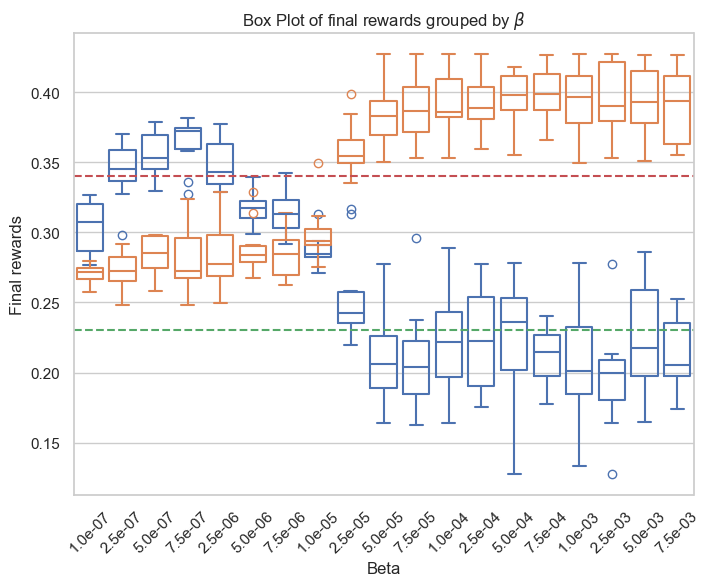

In [25]:
repart_rewards(fin_df)